**Lab**
1. Load an image
2. Compute its negative
3. Without & with a LUT, apply a gamma correction (report the efficiency gain)
4. Code the histogram equalization function
5. Check if histeq(negative(image))==negative(histeq(image))
6. Perform a contrast stretch clipping the 5% extrema
7. Play with multi-image operators (e.g. NDVI extraction, change detection, RGB to gray)

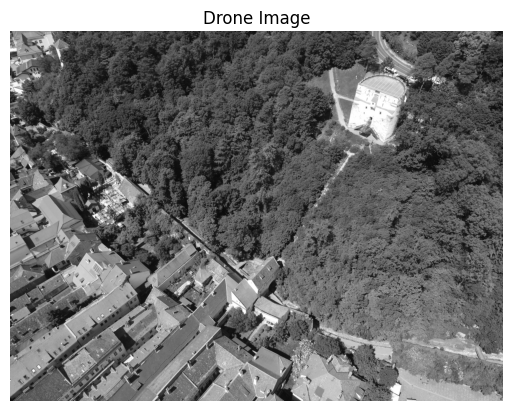

In [28]:
import cv2
import matplotlib.pyplot as plt

# Cargar la imagen
image = cv2.imread("DJI_0073.JPG", cv2.IMREAD_GRAYSCALE)

# OpenCV carga en BGR, lo convertimos a RGB para mostrar correctamente
#image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostrar con matplotlib
plt.imshow(image, cmap="gray")
plt.title("Drone Image")
plt.axis("off")
plt.show()

In [29]:
# Ver la matriz completa
print(image)
# Mostrar dimensiones de la imagen (alto, ancho, canales)
print("Shape:", image.shape)  # (rows, cols, channels)

# Acceder al valor de un píxel específico en (fila=50, columna=100)
pixel = image[50, 100]  
print("Valor en (50,100):", pixel)   # [B, G, R]

[[ 74  62  86 ...  62  46  25]
 [ 72  62  77 ...  41  45  43]
 [ 75  69  76 ...  41  48  50]
 ...
 [ 18  17  17 ... 156 158 150]
 [ 20  18  16 ... 166 167 162]
 [ 17  19  22 ... 162 159 155]]
Shape: (3000, 4000)
Valor en (50,100): 81


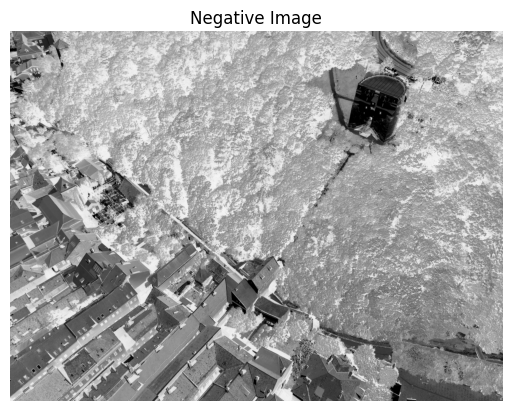

In [30]:
# negative image
import numpy as np

negative_img = 255 - image

plt.imshow(negative_img, cmap="gray")
plt.title("Negative Image")
plt.axis("off")
plt.show()


Tiempo de ejecución: 0.08124113082885742 segundos


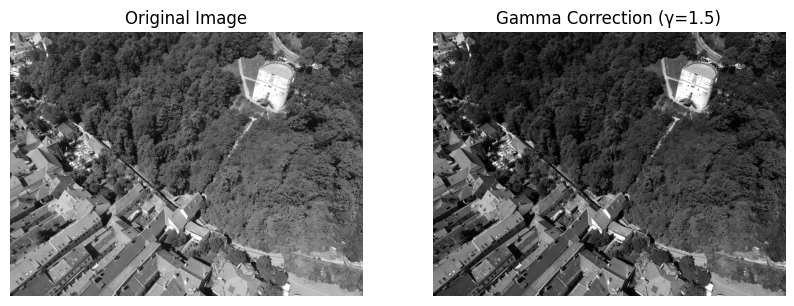

In [37]:
# Without LUT, apply a gamma correction

import time 

#gamma =  0.2 #narrowed bright areas and widened dark areas
gamma = 1.5 #narrowed dark areas and widened bright areas

start_time = time.time()
img_gamma = (255 * ((image / 255) ** gamma)).astype(np.uint8)
end_time = time.time()
print(f"Tiempo de ejecución: {end_time - start_time} segundos")

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(img_gamma, cmap="gray")
plt.title(f"Gamma Correction (γ={gamma})")
plt.axis("off")
plt.show()


Tiempo de ejecución: 0.0016989707946777344 segundos


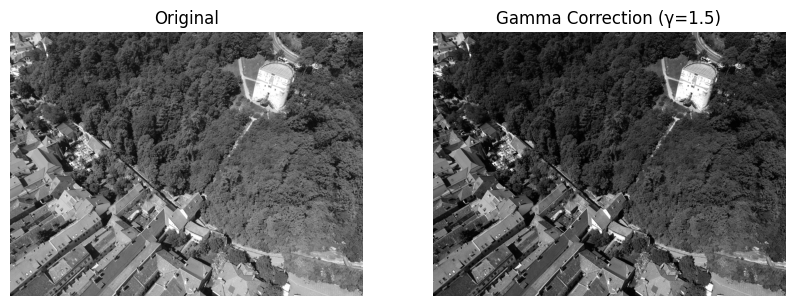

In [38]:

# With a LUT, apply a gamma correction (report the efficiency gain)
#gamma = 0.2
gamma = 1.5 #narrowed dark areas and widened bright areas

start_time = time.time()
invGamma = 1.0 / gamma

# Crear Look-Up Table (LUT)
table = np.array([((i / 255.0) ** gamma) * 255 for i in range(256)]).astype(np.uint8)

# Aplicar LUT a la imagen
img_gamma_lut = cv2.LUT(image, table)
end_time = time.time()
print(f"Tiempo de ejecución: {end_time - start_time} segundos")


# Mostrar
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image, cmap="gray")
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img_gamma_lut, cmap="gray")
plt.title(f"Gamma Correction (γ={gamma})")
plt.axis("off")

plt.show()


Without LUC the program took: 0.08 seconds, with LUC it tooks 0.0016 sec.

In [41]:
#histogram equalization function
hist_ini=np.zeros(256,dtype=int)
values=image.flatten()
for v in range(len(hist_ini)):
    for i in values:
        if i==v:
            hist_ini[v]+=1


In [53]:
hist=np.histogram(image.flatten(), bins=256)[0]

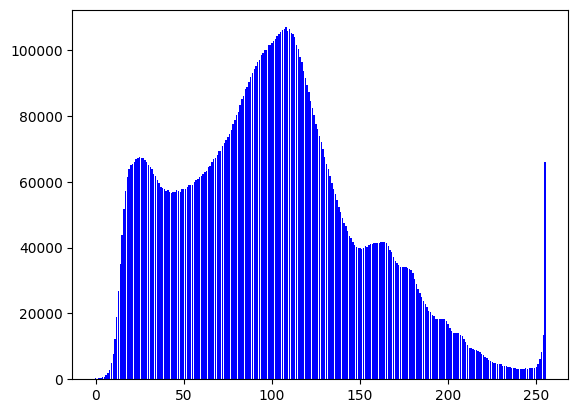

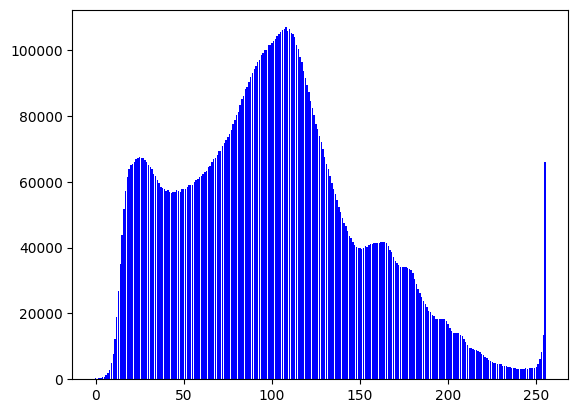

In [60]:
plt.bar(range(256),hist_ini, color='blue')
plt.show()

plt.bar(range(256), hist, color='blue')
plt.show()

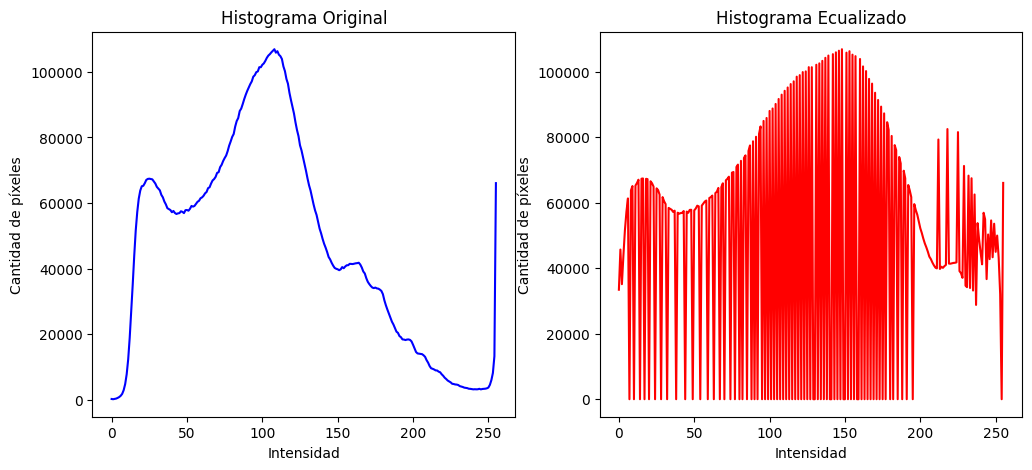

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# 2. CDF y ecualización
cdf = hist.cumsum()
cdf_normalized = ((cdf - cdf.min()) / (cdf.max() - cdf.min()) * 255).astype(np.uint8)
img_equalized = cdf_normalized[image]

# 3. Histograma ecualizado
hist_eq, bins_eq = np.histogram(img_equalized.flatten(), bins=256, range=[0,256])

# 4. Mostrar histogramas
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(hist, color='blue')
plt.title('Histograma Original')
plt.xlabel('Intensidad')
plt.ylabel('Cantidad de píxeles')

plt.subplot(1,2,2)
plt.plot(hist_eq, color='red')
plt.title('Histograma Ecualizado')
plt.xlabel('Intensidad')
plt.ylabel('Cantidad de píxeles')

plt.show()


In [68]:
#Check if histeq(negative(image))==negative(histeq(image))

# Compute negative of image
negative_image = 255 - image

# Apply histogram equalization to negative image
hist_eq_neg, bins = np.histogram(negative_image.flatten(), bins=256, range=[0,256])

# Apply histogram equalization to original image
hist_eq_orig = np.histogram(image.flatten(), bins=256, range=[0,256])[0]

# Compute negative of histogram equalized image
hist_eq_neg_neg = 255 - hist_eq_neg

# Check if histeq(negative(image))==negative(histeq(image))

hist_eq_neg == hist_eq_neg_neg

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [72]:
hist_eq_neg + hist_eq_neg_neg

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 25

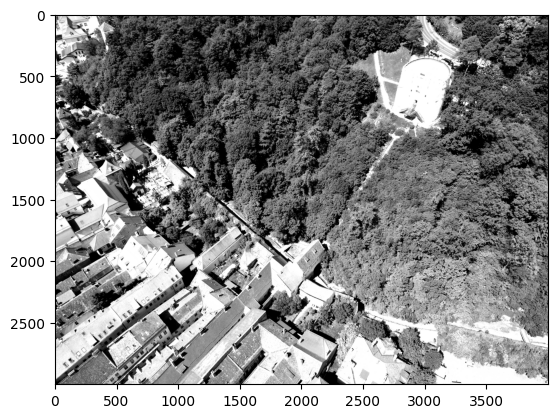

In [83]:
#Perform a contrast stretch clipping the 5% extrema
min_val = np.percentile(image, 10)
max_val = np.percentile(image, 90)

contrast_stretched = np.clip(image, min_val, max_val)

plt.imshow(contrast_stretched, cmap="gray")
plt.show()

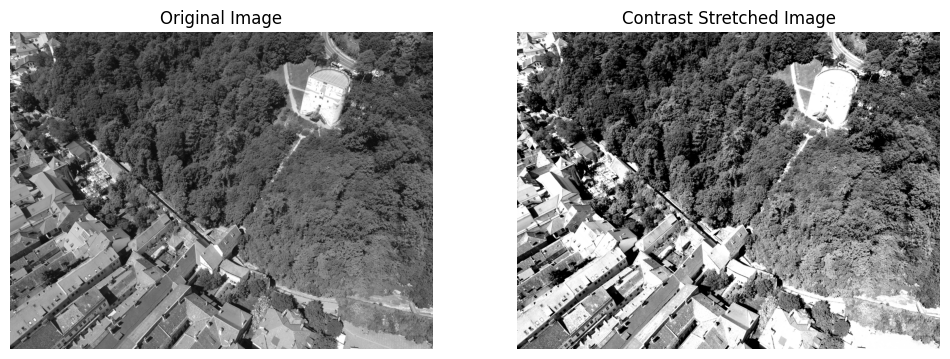

In [84]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(contrast_stretched, cmap="gray")
plt.title("Contrast Stretched Image")
plt.axis("off")
plt.show()

In [ ]:
#create a NDVI image